Prediciting Product Sales of 76 different stores using historical sales data for the past 3 years on a week-on-week basis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Importing Data Set
df = pd.read_csv('sales_data.csv')
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
# Data types on each roll
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
# Quick EDA analysis on Data
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


Data Preprocessing

In [6]:
# Spliting week column into day month and year
df[['Day','Month','Year']] = df['week'].str.split('/', expand = True)
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Day,Month,Year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [7]:
# Drop the week column
df = df.drop('week', axis = 1)

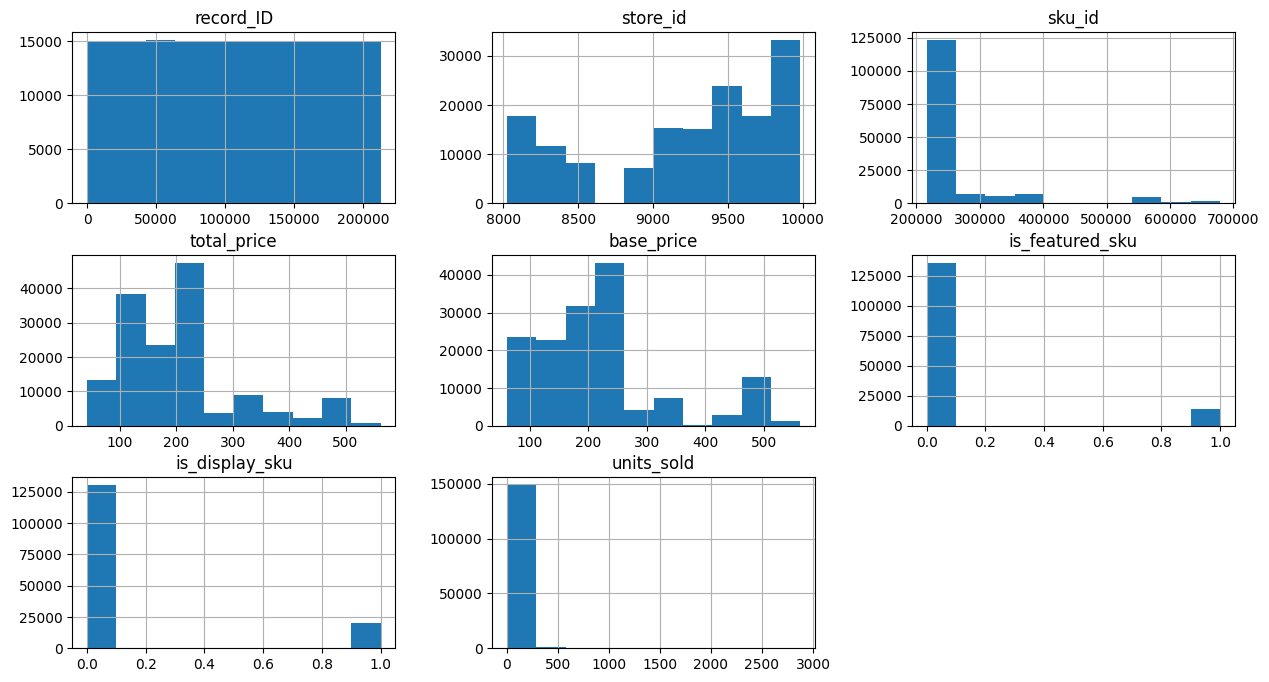

In [8]:
# Data distribution across each column
df.hist(figsize=(15,8))
plt.show()

In [9]:
# We dont need the record_id Column
df = df.drop('record_ID', axis =1 )

In [10]:
# Counts of unique value in store
len(df.store_id.unique())
# we have 76 unique id for 76 stores

76

In [11]:
# Counts of unique value in sku_id
len(df.sku_id.unique())
# we have 28 unique product id across the 76 stores

28

In [12]:
# getting the 99 percentile of the unit sold
df.units_sold.quantile(0.99)
# there is a big gap betweeem the highest number of unit sold with the 99 percentile

283.0

In [14]:
# Dropping row data that the unit sold is more than thr 99 percentile
df_nw = df[df.units_sold < df.units_sold.quantile(0.99)]
df_nw
# 148636 rows
# 1514 rows dropped

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Day,Month,Year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

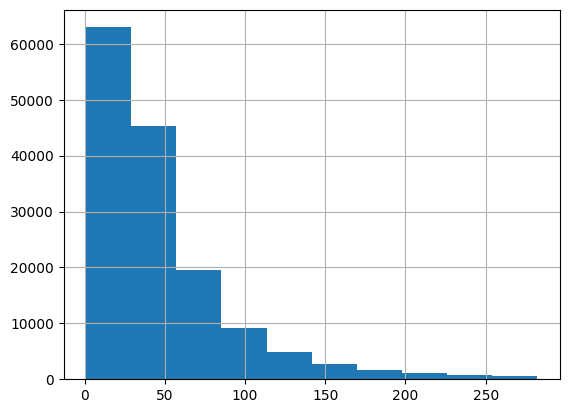

In [15]:
# Plotting the histogram of the unit sold
df_nw.units_sold.hist()

Endcoding the store_id and sku_ID as a classification column

In [16]:
# Encoding Store_id
pd.get_dummies(df_nw.store_id, prefix='store')
#Joining it to the dataframe
df_nw = df_nw.join(pd.get_dummies(df_nw.store_id, prefix='store')).drop('store_id', axis= 1)
df_nw

,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Day,Month,Year,store_8023,...,store_9872,store_9876,store_9879,store_9880,store_9881,store_9890,store_9909,store_9954,store_9961,store_9984
0,216418,99.0375,111.8625,0,0,20,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
1,216419,99.0375,99.0375,0,0,28,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
2,216425,133.9500,133.9500,0,0,19,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
3,216233,133.9500,133.9500,0,0,44,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
4,217390,141.0750,141.0750,0,0,52,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,223245,235.8375,235.8375,0,0,38,09,07,13,False,...,False,False,False,False,False,False,False,False,False,True
150146,223153,235.8375,235.8375,0,0,30,09,07,13,False,...,False,False,False,False,False,False,False,False,False,True
150147,245338,357.6750,483.7875,1,1,31,09,07,13,False,...,False,False,False,False,False,False,False,False,False,True
150148,547934,141.7875,191.6625,0,1,12,09,07,13,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
# Encoding sku_id
pd.get_dummies(df_nw.sku_id, prefix='item')
#Joining it to the dataframe
df_nw = df_nw.join(pd.get_dummies(df_nw.sku_id, prefix='item')).drop('sku_id', axis= 1)
df_nw

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Day,Month,Year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


Import Random Forest Regressor from Sckit Library

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X,y = df_nw.drop('units_sold', axis = 1), df_nw['units_sold']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)


RandomForestRegressor(n_jobs=-1)

In [21]:
model.score(X_test,y_test)
# 0.8284

0.8284613895780902

In [22]:
from sklearn.metrics import root_mean_squared_error
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)
rmse
#rmse 17.79

17.79483931206903

Hyper Parameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [10,20],
    'min_samples_split' : [2,3]
}

model = RandomForestRegressor (n_jobs = -1)
grid_search = GridSearchCV(model,param_grid,verbose=2,cv =3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  14.3s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  21.7s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  20.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  40.3s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  26.7s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  25.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  13.1s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.0s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  11.1s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  24.6s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  24.8s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [25]:
best_model = grid_search.best_estimator_
grid_search.best_params_
#{'min_samples_split': 3, 'n_estimators': 20}

{'min_samples_split': 3, 'n_estimators': 20}

In [26]:
best_model.score(X_test,y_test)
# 0.8223

0.8222329282555121